In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd 
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd
from IPython.display import Markdown

In [3]:
now = datetime.now().date()
offset = MonthEnd()

<h3>Загрузка исходных данных</h3>

In [40]:
names=['geo', 'url', 'note', 'cost', 'duration']
data = pd.read_csv('../raw_data.csv', names=names, index_col=[0,1]).fillna('')

In [53]:
%store -r organic
%store -r positions

<h2>1. Анализ бюджета</h2>

### Таблица расходов

In [41]:
curr_month = data.index[-1][0]
data.ix[curr_month]

,geo,url,note,cost,duration
0,both,https://sape.ru,биржа арендных ссылок,1139.0,1
1,both,https://etxt.biz,тексты,2060.0,1
2,msk,http://moskva.svadbi.ru/love-forever,,0.0,12
3,spb,http://speterburg.svadbi.ru/love-forever-spb,,0.0,12
4,msk,http://tableplanner.ru,,604.8,1
5,msk,http://my-svadba.ru/company/blog/151379/,,0.0,12
6,msk,http://www.urasvadba.ru/4062,,1000.0,1
7,msk,https://porapoparam.ru/catalog/5628,скидка -35%,3919.5,6
8,spb,http://www.svadbaspb.ru/catalog/razdel15/,,3618.0,6
9,spb,http://www.svadbaspb.ru/dress/133/,,510.0,1


**cost** — стоимость размещения: 0 — условно бесплатно.

**duration** — время размещения в месяцах: 1 — помесячная оплата, 12 — бессрочное размещение.

<a href="https://yadi.sk/d/Nh-WeRpo3Jfskg">Скачать</a> файл с исходными данными

<a href="https://yadi.sk/d/1EXvjiS13JZEna">Посмотреть</a> платёжную информацию за последний период

### Расходы в разрезе регионов

In [55]:
#data.groupby('reg')[['cost']].sum()
pd.pivot_table(data, values='cost', index=['geo'], aggfunc=sum, margins=True).to_frame()

,cost
geo,
both,13454.87
msk,46211.25
spb,26314.00
All,85980.12


## 2. Анализ трафика

Таблица с данными по величине поискового трафика за текущий год и его изменениям к месяцу и году.

In [49]:
organic['2017']

,traffic,MoM,YoY
2017-01-31,14468,60.079664,-9.834227
2017-02-28,12187,-15.765828,-29.108254
2017-03-31,14330,17.584311,-19.607293
2017-04-30,13821,-3.551989,-21.787109
2017-05-31,15041,8.827147,-19.182204
2017-06-30,15083,0.279237,-19.860794


Источник: https://metrika.yandex.ru

<p><b>YoY</b> — изменения год к году, %
<br/><b>MoM</b> — изменения месяц к месяцу, %</p>

### Подсветка данных

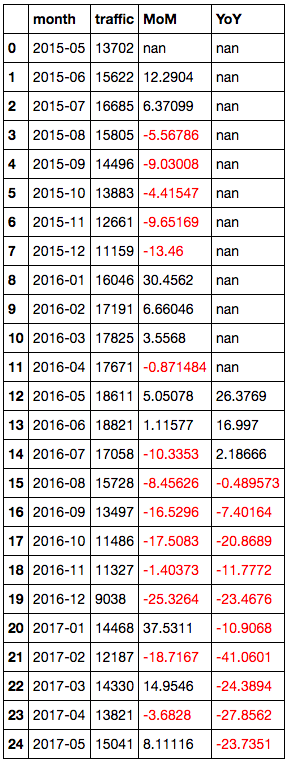

In [489]:
from IPython.display import display, Image
display(Image('img/data_neg_select.png'))

Отрицательные изменения (падение трафика) выделены красным.

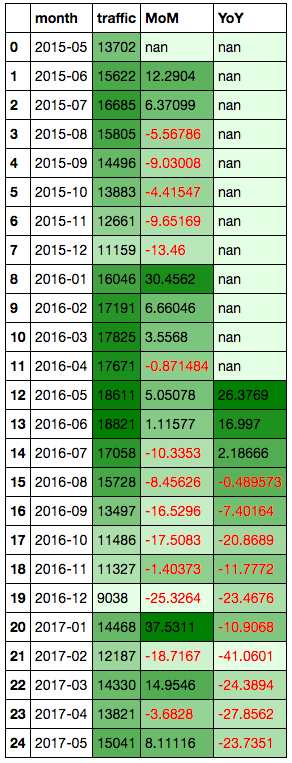

In [490]:
display(Image('img/data_grad.png'))

Ячейки таблицы градиентно залиты цветом в зависимости от величины содержимого.

### Диаграмма изменеия значений MoM 

In [50]:
negative_MoM = organic['MoM'] < 0

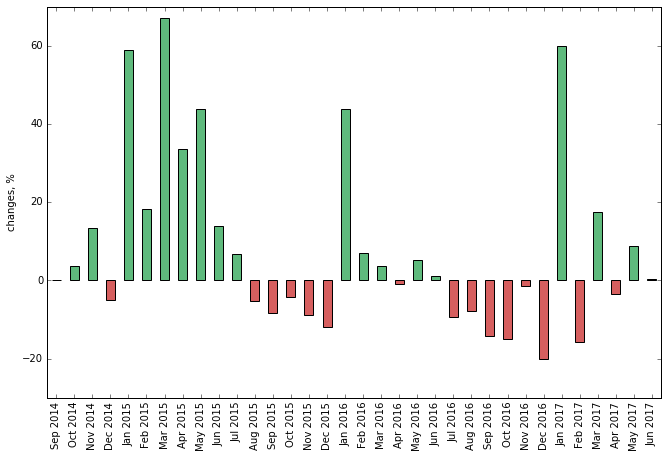

In [64]:
fig = plt.figure(figsize=(11,7))
ax = fig.add_subplot(1,1,1)
organic.MoM.plot(ax=ax, kind='bar', stacked=True, 
                 color=negative_MoM.map({True: '#d65f5f', False: '#5fba7d'}));
ax.set_ylabel('changes, %');
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in organic.index]);

На диаграмме чётко видна сезонная волатильность трафика.

## 3. Анализ позиций

In [61]:
positions

domvesta.ru salon-love-forever.ru bel-avantage.ru  \
2017-06-03 вечерние платья           30                    13              51   
           свадебные платья           5                    18               3   
           свадебный салон            5                     3              20   
2017-06-10 вечерние платья           20                    13              51   
           свадебные платья           4                    22               3   
           свадебный салон            6                     4              16   
2017-06-20 вечерние платья           25                    15              51   
           свадебные платья           7                    17               3   
           свадебный салон            4                     3               9   
2017-06-28 вечерние платья     ↑17 (+8)                    15              51   
           свадебные платья     ↑6 (+1)              ↑11 (+6)         ↑2 (+1)   
           свадебный салон      ↑2 (+2)               ↓4 (-1)        ↓15 (-6)   

                            marytrufel.ru  
2017-06-03 вечерние платья             45  
           свадебные платья             8  
           свадебный салон              7  
2017-06-10 вечерние платья             51  
           свадебные платья            15  
           свадебный салон             11  
2017-06-20 вечерние платья             42  
           свадебные платья            10  
           свадебный салон             17  
2017-06-28 вечерние платья       ↑36 (+6)  
           свадебные платья      ↓17 (-7)  
           свадебный салон        ↑8 (+9)

Источник: https://xml.yandex.ru

Позиции могут отличаться от позиций в текущей выдаче Яндекса из-за особенностей сервиса xml.yandex, а также от индивидуализации SERP.

**51** — отсутствие сайта в ТОП-50.